In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","dummy","eco2","etvoc","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mg811","mh-z14a","notice","s8lp","scd30","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [8]:
sensores = ["s8lp","sen0220"]
fecha1 = parse("2021-08-16")
fecha2 = fecha1 + pd.Timedelta("8D")
datos = pd.concat([tb.get_df(key=sensor,start_datetime=fecha1,end_datetime=fecha2) for sensor in sensores],axis=1)
datos.index = datos.index + pd.Timedelta("-5H")
# datos.tail()


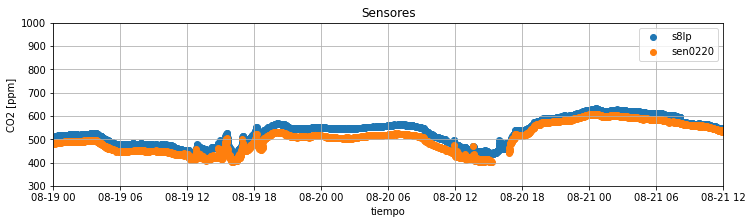

In [11]:
fig, ax = plt.subplots(figsize=(12,3))

fecha1 = parse("2021-08-19")
fecha2 = fecha1 + pd.Timedelta("2.5D")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor)

ax.legend()
